# Creating a Demand Curve

In [1]:
import nbforms
import numpy as np
from datascience import *
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

We will create a few demand curves based on the class. Start by running the cell below and logging in.

In [2]:
form = nbforms.Form()

86e11a87ced3622501498933605dcc883bfe9b5987670440a8bcd529c0c22d13


Please run the cell below, fill out the questions, and then click Submit. The Submit button should turn green a few seconds after you click it once it registers your responses.

In [3]:
form.ask()

Now let's analyze the classes data by pulling in everyone's responses.

In [5]:
demand_table = (
    form.to_table()
    .relabeled("q1", "green tea kit kat")
    .relabeled("q2", "burrito")
    .relabeled("q3", "greek tickets")
    .relabeled("q4", "iphone 13")
)
demand_table

green tea kit kat,burrito,greek tickets,iphone 13
$1.50,$15.00,$150,$1750
$2.00,$20.00,$200,$3000
$0.25,$2.50,$50,$250
$0.50,$7.50,$75,$750
$1.50,$12.50,$125,$2000


We need to turn all of this data into numeric types and preview them using histograms, one for each good. We will apply the `float` function to each column of the table; do not worry if you do not know what the code is doing.

In [6]:
for label in demand_table.labels:
    col = demand_table.apply(lambda s: float(s[1:]), label)
    demand_table = demand_table.drop(label).with_column(label, col)
    
demand_table

green tea kit kat,burrito,greek tickets,iphone 13
1.5,15,150,1750
2,20,200,3000
0.25,2.5,50,250
0.5,7.5,75,750
1.5,12.5,125,2000


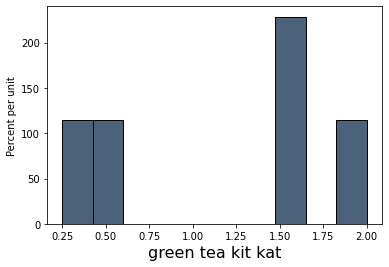

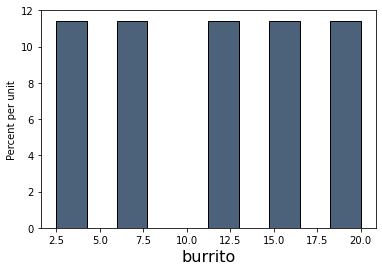

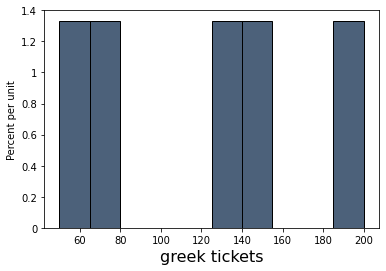

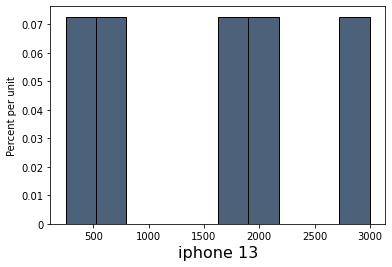

In [7]:
demand_table.hist('green tea kit kat')
demand_table.hist('burrito')
demand_table.hist('greek tickets')
demand_table.hist('iphone 13')

Let's start by looking at the demand for green tea kit kats. How many people would buy green tea kit kats at a given price? Let's assume that a person would be willing to buy the good at a price less than their bid price.  

In [8]:
# This is a column of bid values for Greeen Tea Kitkats that you've all inputted. 
kit_kats = demand_table.select('green tea kit kat')
kit_kats

green tea kit kat
1.5
2
0.25
0.5
1.5


In [9]:
# This cell does some python magic. You do not need to worry about what's going on. 
prices = pd.DataFrame({'price':[0.25, 0.5, 0.75, 1.00, 1.25, 1.5,1.75,2]})
KitkatsByPrice = kit_kats.group("green tea kit kat")
kkp = KitkatsByPrice.to_df()
gtk = (
    prices
    .merge(kkp, left_on='price', how='left', right_on='green tea kit kat')
    .fillna(0).drop('green tea kit kat', axis=1)
)
kit_kats_table = Table.from_df(gtk)
Q_demand = np.flip(np.cumsum(np.flip(kit_kats_table.group("price", sum).column(1))))
gtk_demand = Table().with_columns(
    'price', prices.price, 
    'quantity', Q_demand
)
gtk_demand

price,quantity
0.25,5
0.5,4
0.75,3
1,3
1.25,3
1.5,3
1.75,1
2,1


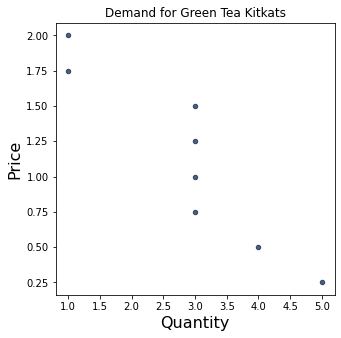

In [10]:
# Let's graph our results
gtk_demand.scatter("quantity", "price")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for Green Tea Kitkats');

Now let's find the slope and intercept of the line of best fit. The cell below defines some functions that you'll learn about in the later portions of Data 8.

In [11]:
std_units = lambda a: (a - np.mean(a)) / np.std(a)
corr = lambda x, y: np.mean(std_units(x) * std_units(y))
slope = lambda x, y: corr(x, y) * np.std(y) / np.std(x)
intercept = lambda x, y: np.mean(y) - slope(x, y) * np.mean(x)

In [12]:
slope(gtk_demand["quantity"], gtk_demand["price"])

-0.41747572815533995

In [13]:
intercept(gtk_demand["quantity"], gtk_demand["price"])

2.3252427184466025

We can use the same code as above to create demand curves for our other products as well!

In [14]:
#Gourmet Burrito
prices_burrito = pd.DataFrame({'price':[2.50, 5, 7.50, 10, 12.5, 15,17.5,20]})

burritos = demand_table.select('burrito')
burritosByPrice = burritos.group("burrito")
bbp = burritosByPrice.to_df()
gb = (
    prices_burrito
    .merge(bbp, left_on='price', how='left', right_on='burrito')
    .fillna(0).drop('burrito', axis=1)
)

burritos_table = Table.from_df(gb)
Q_demand_burrito = np.flip(np.cumsum(np.flip(burritos_table.group("price", sum).column(1))))

gb_demand = Table().with_columns(
    'price', prices_burrito.price, 
    'quantity', Q_demand_burrito
)

burrito_slope = slope(gb_demand["quantity"], gb_demand["price"])
burrito_intercept = intercept(gb_demand["quantity"], gb_demand["price"])
print("Slope: " + str(burrito_slope))
print("Intercept: " +  str(burrito_intercept))

Slope: -4.11764705882353
Intercept: 23.08823529411765


In [15]:
#Greek Theatre Tickets
prices_tickets = pd.DataFrame({'price':[25, 50, 75, 100, 125, 150,175,200]})

tickets = demand_table.select('greek tickets')
ticketsByPrice = tickets.group("greek tickets")
tbp = ticketsByPrice.to_df()
gt = (
    prices_tickets
    .merge(tbp, left_on='price', how='left', right_on='greek tickets')
    .fillna(0).drop('greek tickets', axis=1)
)

tickets_table = Table.from_df(gt)
Q_demand_tickets = np.flip(np.cumsum(np.flip(tickets_table.group("price", sum).column(1))))

gt_demand = Table().with_columns(
    'price', prices_tickets.price, 
    'quantity', Q_demand_tickets
)

tickets_slope = slope(gt_demand["quantity"], gt_demand["price"])
tickets_intercept = intercept(gt_demand["quantity"], gt_demand["price"])
print("Slope: " + str(tickets_slope))
print("Intercept: " +  str(tickets_intercept))


Slope: -37.5
Intercept: 225.0


In [16]:
#Iphone 13
prices_iphone = pd.DataFrame({'price':[250, 500, 750, 1000, 1250, 1500,1750,2000, 2250, 2500, 2750, 3000]})

iphones = demand_table.select('iphone 13')
iphonesByPrice = iphones.group("iphone 13")
ibp = iphonesByPrice.to_df()
iphone13 = (
    prices_iphone
    .merge(ibp, left_on='price', how='left', right_on="iphone 13")
    .fillna(0).drop("iphone 13", axis=1)
)

iphones_table = Table.from_df(iphone13)
Q_demand_iphones = np.flip(np.cumsum(np.flip(iphones_table.group("price", sum).column(1))))

iphone13_demand = Table().with_columns(
    'price', prices_iphone.price, 
    'quantity', Q_demand_iphones
)

iphones_slope = slope(iphone13_demand["quantity"], iphone13_demand["price"])
iphones_intercept = intercept(iphone13_demand["quantity"], iphone13_demand["price"])
print("Slope: " + str(iphones_slope))
print("Intercept: " +  str(iphones_intercept))

Slope: -627.4900398406375
Intercept: 3246.0159362549803


Here we can see the demand curves for our different products! 

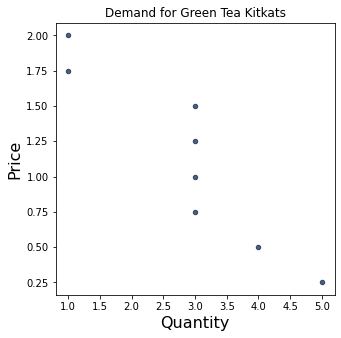

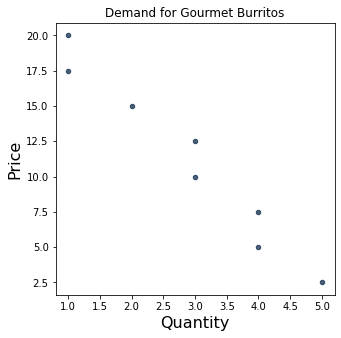

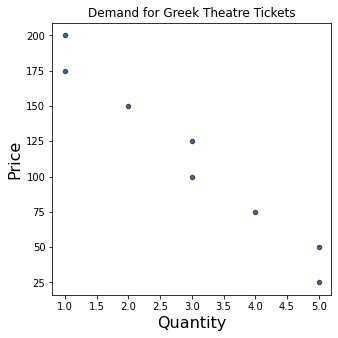

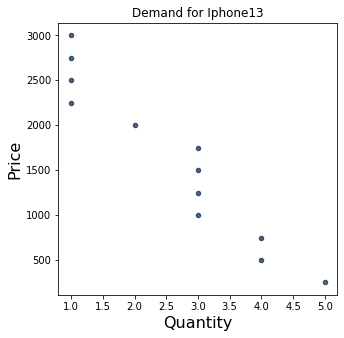

In [17]:
gtk_demand.scatter("quantity", "price")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for Green Tea Kitkats');

gb_demand.scatter("quantity", "price")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for Gourmet Burritos');

gt_demand.scatter("quantity", "price")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for Greek Theatre Tickets');

iphone13_demand.scatter("quantity", "price")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for Iphone13');